In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import searchnets

In [2]:
ROOT = Path('~/Documents/repos/L2M/visual-search-nets')
ROOT = ROOT.expanduser()
DATA_DIR = ROOT.joinpath('data')

In [3]:
data_csv_path = ROOT.joinpath('../visual_search_stimuli/alexnet_multiple_stims/alexnet_multiple_stims_120000samples_split.csv')
results_gz_path = DATA_DIR.joinpath('results/alexnet_transfer_lr_1e-03_no_finetune_multiple_stims_120000samples/searchnets_alexnet_transfer_lr_1e-03_no_finetune_multiple_stims_120000samples_trained_200_epochs_test_results.gz')
net_name = 'alexnet'
method = 'transfer'
learning_rate = 1e-3

In [4]:
pal = sns.color_palette("Paired")

In [5]:
cmaps = {
    'alexnet': {
        'transfer': {
            'unit_both': pal[0],
            'mn_both': pal[1],
        },
        'initialize': {
            'unit_both': pal[2],
            'mn_both': pal[3],            
        }
    },
    'CORnet_Z': {
        'transfer': {
            'unit_both': pal[4],
            'mn_both': pal[5],
        },
        'initialize': {
            'unit_both': pal[6],
            'mn_both': pal[7],            
        }
    }
}

In [7]:
df_list = []
net_name = 'alexnet'
for method in ['initialize', 'transfer']:
    if method == 'transfer':
        results_gz_path = DATA_DIR.joinpath('results/alexnet_transfer_lr_1e-03_no_finetune_multiple_stims_120000samples/searchnets_alexnet_transfer_lr_1e-03_no_finetune_multiple_stims_120000samples_trained_200_epochs_test_results.gz')
    elif method == 'initialize':
        results_gz_path = DATA_DIR.joinpath('results/alexnet_initialize_lr_1e-03_multiple_stims_120000samples/searchnets_alexnet_initialize_lr_1e-03_multiple_stims_120000samples_trained_200_epochs_test_results.gz')
    df_list.append(
        searchnets.utils.general.results_df(data_csv_path, results_gz_path, net_name, method, learning_rate)
    )

df_alexnet = pd.concat(df_list)

/home/bart/Documents/repos/L2M/visual-search-nets/src/searchnets/utils/general.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testset['y_true'] = df_testset['target_condition'] == 'present'
/home/bart/Documents/repos/L2M/visual-search-nets/src/searchnets/utils/general.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testset['y_pred'] = preds_per_model[key]
/home/bart/Documents/repos/L2M/visual-search-nets/src/searchnets/utils/metrics.py:15: RuntimeWarning: invalid value encountered in long_s

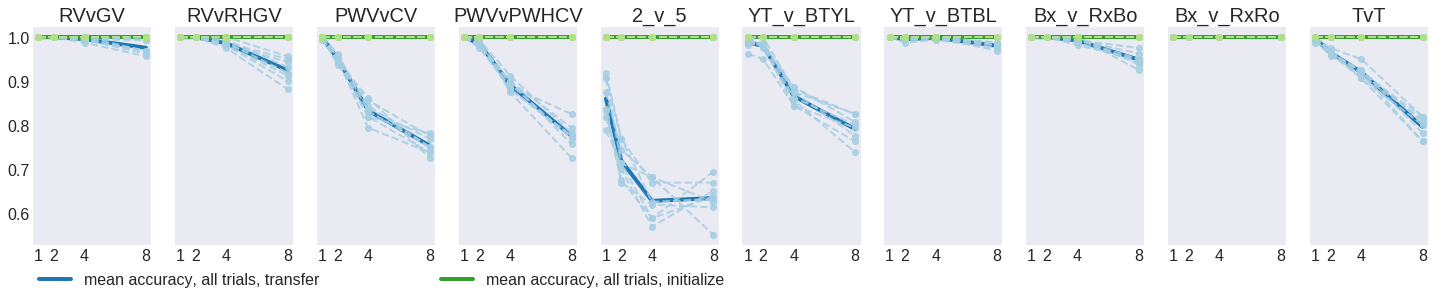

In [8]:
figsize=(25,4)
fig, ax = plt.subplots(1, 10, sharex=True, sharey=True, figsize=figsize)
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

add_legend = False

net_name = 'alexnet'
for method in ['transfer', 'initialize']:
    for col, (stim_name, stim_abbrev) in enumerate(zip(
        ['RVvGV', 'RVvRHGV', 'PWVvCV', 'PWVvPWHCV', '2_v_5', 'YT_v_BTYL', 'YT_v_BTBL', 'Bx_v_RxBo', 'Bx_v_RxRo', 'TvT'],
        ['RVvGV', 'RVvRHGV', 'PWVvCV', 'PWVvPWHCV', '2_v_5', 'YT_v_BTYL', 'YT_v_BTBL', 'Bx_v_RxBo', 'Bx_v_RxRo', 'TvT'])):
            unit_colors = {'both': cmaps[net_name][method]['unit_both']}
            mn_colors = {'both': cmaps[net_name][method]['mn_both']}

            searchnets.plot.metric_v_set_size_df(df=df_alexnet, 
                                                 net_name=net_name,
                                                 method=method, 
                                                 stimulus=stim_abbrev,
                                                 metric='accuracy', 
                                                 conditions=['both'],
                                                 unit_colors=unit_colors,
                                                 mn_colors=mn_colors,
                                                 set_ylim=False,
                                                 ax=ax[col],
                                                 ylim=(0.5, 1.05),
                                                 add_legend=add_legend)
            ax[col].set_title(stim_abbrev)

handles, labels = ax[0].get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(0., -0.2, 0.5, .102), loc='upper left',
           ncol=2, mode="expand", borderaxespad=0.)

            
plt.savefig('searchstims_alexnet_transfer_initialize_120000samples.png', bbox_inches="tight")

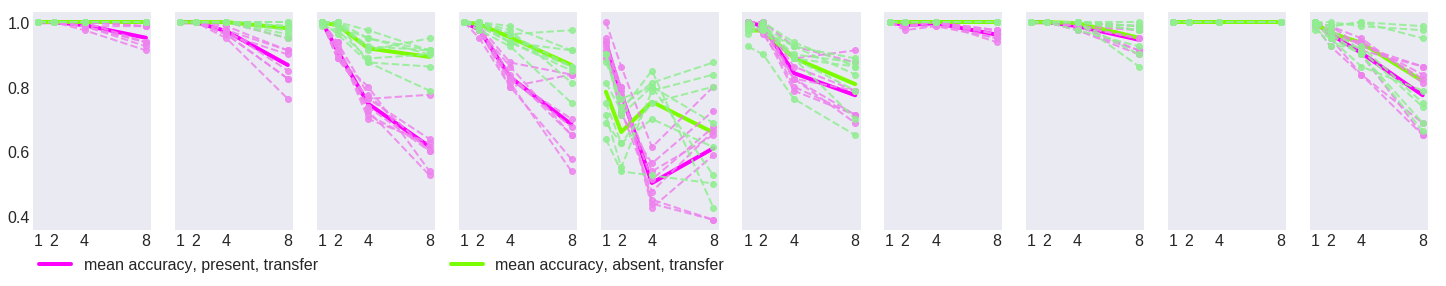

In [19]:
figsize=(25,4)
fig, ax = plt.subplots(1, 10, sharex=True, sharey=True, figsize=figsize)
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

add_legend = False
method = 'transfer'

for col, (stim_name, stim_abbrev) in enumerate(zip(
        ['RVvGV', 'RVvRHGV', 'PWVvCV', 'PWVvPWHCV', '2_v_5', 'YT_v_BTYL', 'YT_v_BTBL', 'Bx_v_RxBo', 'Bx_v_RxRo', 'TvT'],
        ['RVvGV', 'RVvRHGV', 'PWVvCV', 'PWVvPWHCV', '2_v_5', 'YT_v_BTYL', 'YT_v_BTBL', 'Bx_v_RxBo', 'Bx_v_RxRo', 'TvT'])):
        unit_colors = {'both': cmaps[net_name][method]['unit_both']}
        mn_colors = {'both': cmaps[net_name][method]['mn_both']}

        searchnets.plot.metric_v_set_size_df(df=df_alexnet, 
                                             net_name='alexnet',
                                             method=method, 
                                             stimulus=stim_abbrev,
                                             metric='accuracy', 
                                             conditions=['present', 'absent'],
                                             set_ylim=False,
                                             ax=ax[col],
                                             ylim=(0.5, 1.05),
                                             add_legend=add_legend)

handles, labels = ax[0].get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(0., -0.2, 0.5, .102), loc='upper left',
           ncol=2, mode="expand", borderaxespad=0.);

plt.savefig('searchstims_alexnet_transfer_initialize_120000samples_mean_acc_present_absent.png', bbox_inches="tight")

In [9]:
df_list = []

net_name = 'CORnet_Z'
for method in ['initialize', 'transfer']:
    if method == 'transfer':
        results_gz_path = DATA_DIR.joinpath('results/CORnet_Z_transfer_lr_1e-03_no_finetune_multiple_stims_120000samples/searchnets_CORnet_Z_transfer_lr_1e-03_no_finetune_multiple_stims_120000samples_trained_200_epochs_test_results.gz')
    elif method == 'initialize':
        results_gz_path = DATA_DIR.joinpath('results/CORnet_Z_initialize_lr_1e-03_multiple_stims_120000samples/searchnets_CORnet_Z_initialize_lr_1e-03_multiple_stims_120000samples_trained_200_epochs_test_results.gz')
    df_list.append(
        searchnets.utils.general.results_df(data_csv_path, results_gz_path, net_name, method, learning_rate)
    )

df_CORnet_Z = pd.concat(df_list)

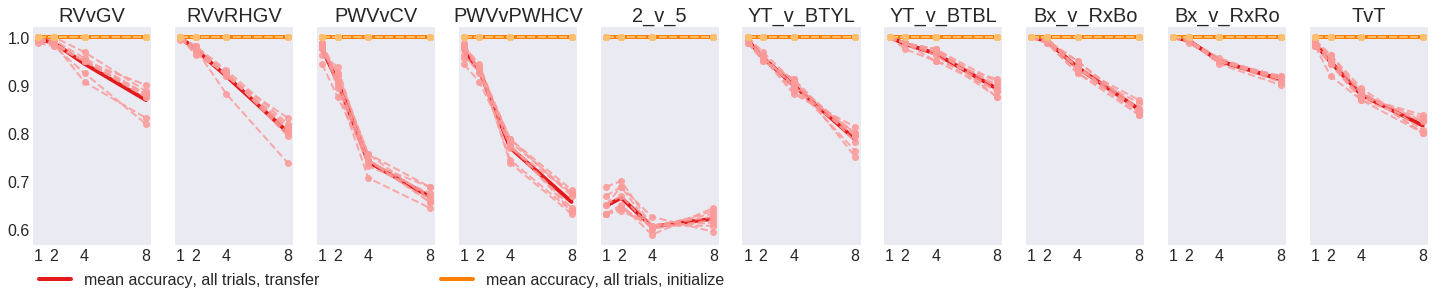

In [11]:
figsize=(25,4)
fig, ax = plt.subplots(1, 10, sharex=True, sharey=True, figsize=figsize)
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

add_legend = False

net_name = 'CORnet_Z'
for method in ['transfer', 'initialize']:
    for col, (stim_name, stim_abbrev) in enumerate(zip(
        ['RVvGV', 'RVvRHGV', 'PWVvCV', 'PWVvPWHCV', '2_v_5', 'YT_v_BTYL', 'YT_v_BTBL', 'Bx_v_RxBo', 'Bx_v_RxRo', 'TvT'],
        ['RVvGV', 'RVvRHGV', 'PWVvCV', 'PWVvPWHCV', '2_v_5', 'YT_v_BTYL', 'YT_v_BTBL', 'Bx_v_RxBo', 'Bx_v_RxRo', 'TvT'])):
            unit_colors = {'both': cmaps[net_name][method]['unit_both']}
            mn_colors = {'both': cmaps[net_name][method]['mn_both']}

            searchnets.plot.metric_v_set_size_df(df=df_CORnet_Z, 
                                                 net_name=net_name,
                                                 method=method, 
                                                 stimulus=stim_abbrev,
                                                 metric='accuracy', 
                                                 conditions=['both'],
                                                 unit_colors=unit_colors,
                                                 mn_colors=mn_colors,
                                                 set_ylim=False,
                                                 ax=ax[col],
                                                 ylim=(0.5, 1.05),
                                                 add_legend=add_legend)
            ax[col].set_title(stim_abbrev)

handles, labels = ax[0].get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(0., -0.2, 0.5, .102), loc='upper left',
           ncol=2, mode="expand", borderaxespad=0.)

            
plt.savefig('searchstims_CORnet_Z_transfer_initialize_120000samples.png', bbox_inches="tight")

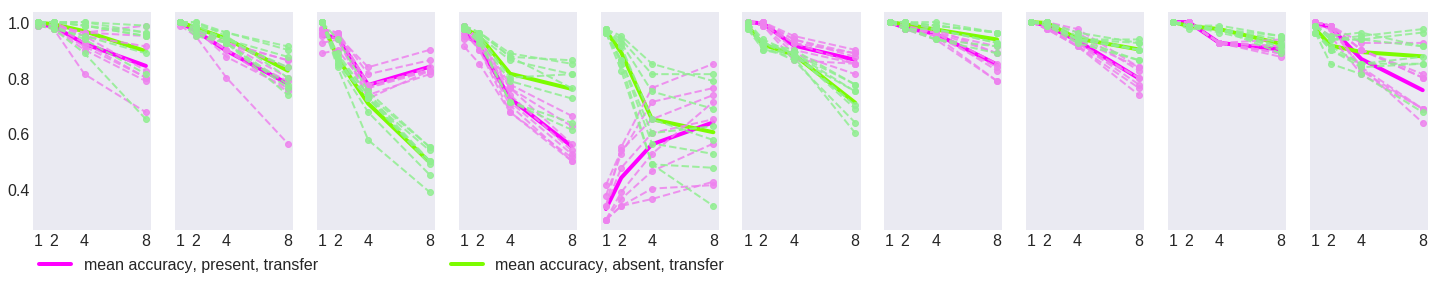

In [20]:
figsize=(25,4)
fig, ax = plt.subplots(1, 10, sharex=True, sharey=True, figsize=figsize)
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

add_legend = False
method = 'transfer'

for col, (stim_name, stim_abbrev) in enumerate(zip(
        ['RVvGV', 'RVvRHGV', 'PWVvCV', 'PWVvPWHCV', '2_v_5', 'YT_v_BTYL', 'YT_v_BTBL', 'Bx_v_RxBo', 'Bx_v_RxRo', 'TvT'],
        ['RVvGV', 'RVvRHGV', 'PWVvCV', 'PWVvPWHCV', '2_v_5', 'YT_v_BTYL', 'YT_v_BTBL', 'Bx_v_RxBo', 'Bx_v_RxRo', 'TvT'])):
        unit_colors = {'both': cmaps[net_name][method]['unit_both']}
        mn_colors = {'both': cmaps[net_name][method]['mn_both']}

        searchnets.plot.metric_v_set_size_df(df=df_CORnet_Z, 
                                             net_name='CORnet_Z',
                                             method=method, 
                                             stimulus=stim_abbrev,
                                             metric='accuracy', 
                                             conditions=['present', 'absent'],
                                             set_ylim=False,
                                             ax=ax[col],
                                             ylim=(0.5, 1.05),
                                             add_legend=add_legend)

handles, labels = ax[0].get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(0., -0.2, 0.5, .102), loc='upper left',
           ncol=2, mode="expand", borderaxespad=0.);

plt.savefig('searchstims_CORnet_Z_transfer_initialize_120000samples_mean_acc_present_absent.png', bbox_inches="tight")